In [2]:
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
cmap_veg = clr.LinearSegmentedColormap.from_list('veg', ['#ffffe5','#f7fcb9','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#006837','#004529'])



In [3]:
basepath = Path("/scratch/crobin/earthnet2023/")
train_paths = list(basepath.glob("train/*/*.nc"))
test_paths = list(basepath.glob("test/*/*.nc"))
pred_paths = list(Path("/Net/Groups/BGI/scratch/crobin/earthnet-models-pytorch/experiments/en23/convlstm_ae/convlstm_ae/config_lr_1e-6/preds/iid/").glob("*/*"))
print("len train set: ", len(train_paths))
print("len test set: ", len(test_paths))
print("len prediction set: ", len(pred_paths))

len train set:  44141
len test set:  4534
len prediction set:  0


In [65]:
filepath = test_paths[10] #Path('/scratch/crobin/earthnet2023_preprocessed/test/Angola/32KRG5576.nc')

/User/homes/crobin/miniconda3/envs/EarthnetEnv2/lib/python3.8/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


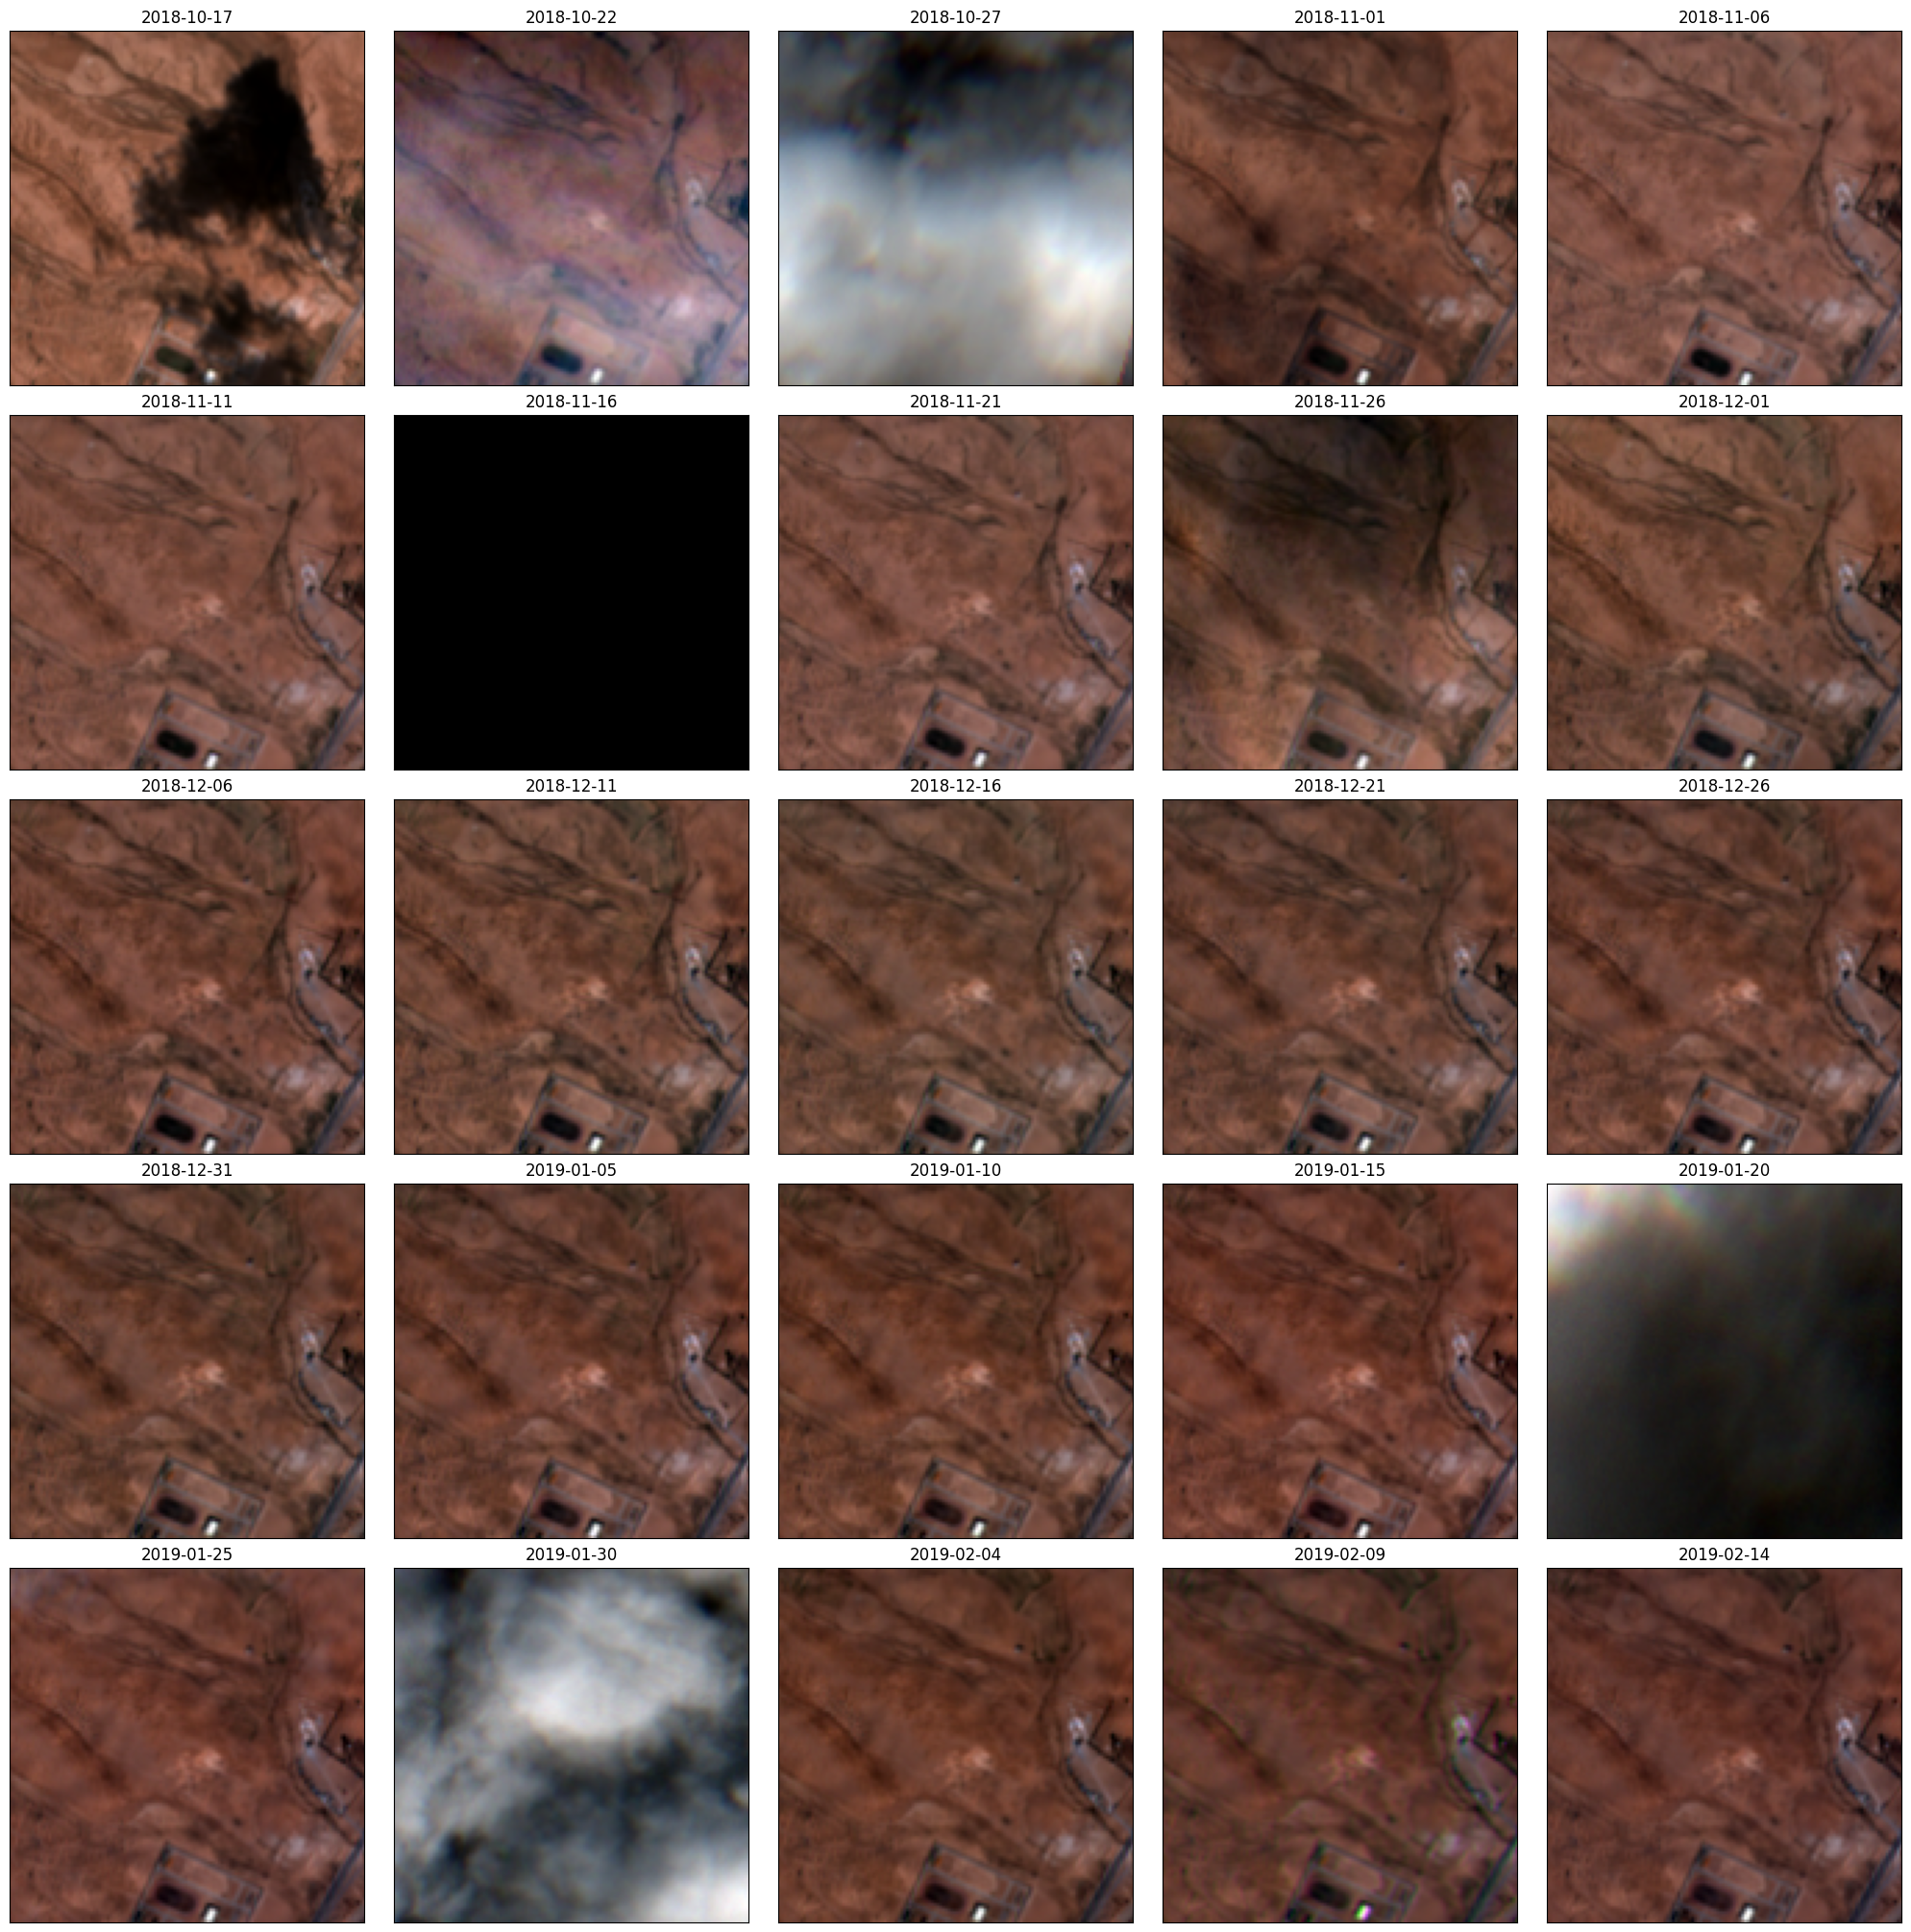

In [70]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))

def brighten(band):
    alpha=1
    beta=0
    return np.clip(alpha*band+beta, 0,255)

minicube = xr.open_dataset(filepath)
time = np.where(minicube.s2_avail.values == 1)[0]

fig, axes = plt.subplots(nrows=5, ncols=5, constrained_layout=True, figsize=(20, 20))
t= 4 
for i in range(5):
    for j in range(5):
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        axes[i,j].set_title(minicube.isel(time=t).time.dt.date.values)

        red = brighten(normalize(minicube.isel(time=t).s2_B04))
        green = brighten(normalize(minicube.isel(time=t).s2_B03))
        blue = brighten(normalize(minicube.isel(time=t).s2_B02))

        rgb_composite= np.dstack((red, green, blue))
        axes[i,j].imshow(rgb_composite)
        t += 5

In [67]:
minicube = xr.open_dataset(filepath)
time = [minicube.time.values[i] for i in range(4, 450, 5)]
mask = (minicube.s2_mask.sel(time=time).values < 1.0)
print(mask)
s2_cube = minicube.s2_B07.sel(time=time)
data = s2_cube * mask

[[[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[ True  True  True ... False False  True]
  [ True  True  True ... False False  True]
  [ True  True  True ... False False  True]
  ...
  [ True  True  True ... False False Fal

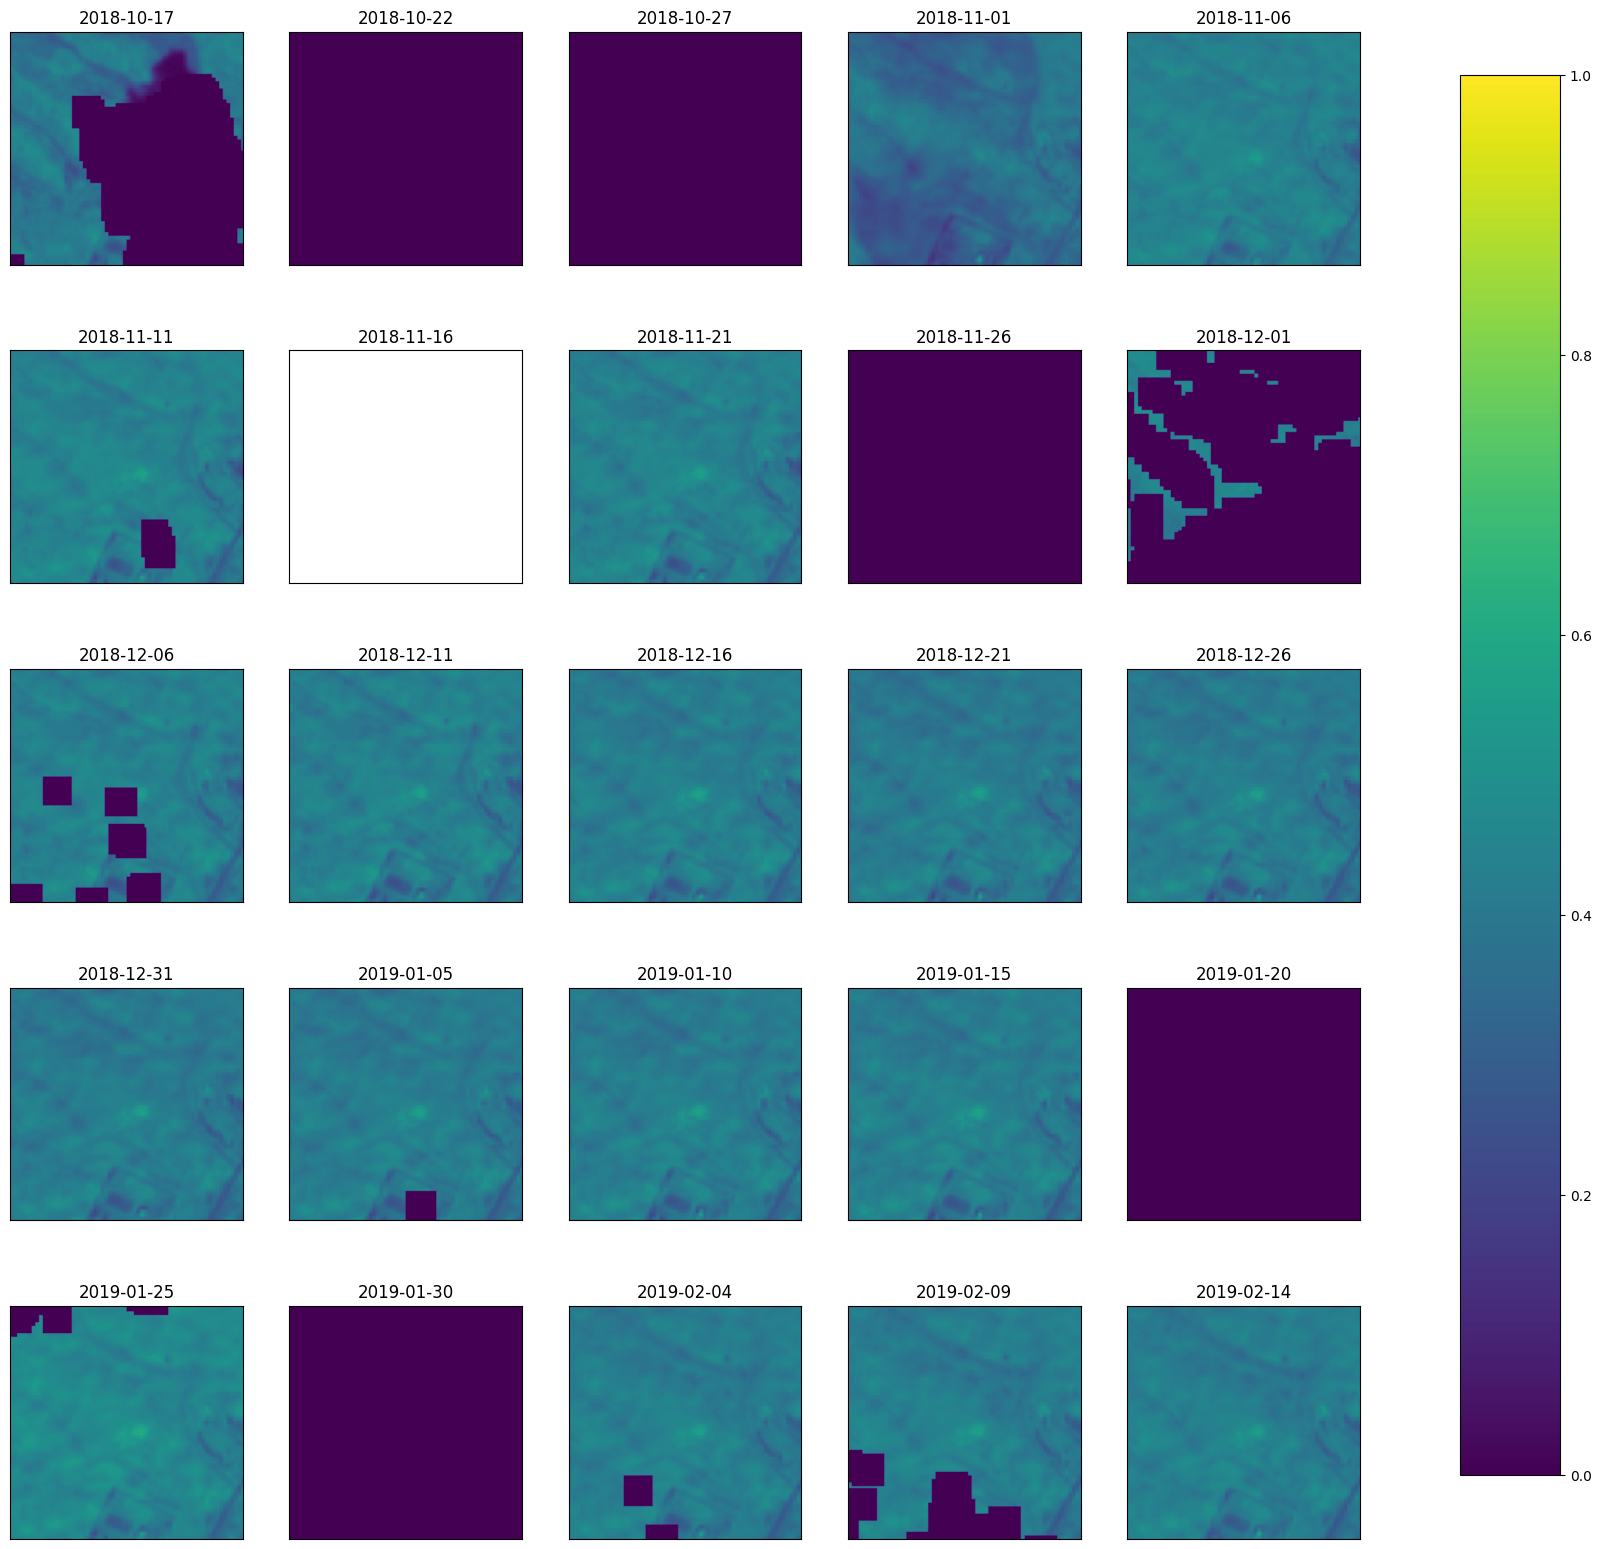

In [68]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
t= 0
for i in range(5):
    for j in range(5):
        #axes[i,j].set_aspect(1)
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        axes[i,j].set_title(data.isel(time=t).time.dt.date.values)
        im = axes[i,j].imshow(data.isel(time=t), vmin=0, vmax=1)
        #im = targ.isel(time=time[t]).plot(cmap=cmap_veg, ax=axes[i,j])
        t += 1 # non gap filled, a lot of nan values

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)


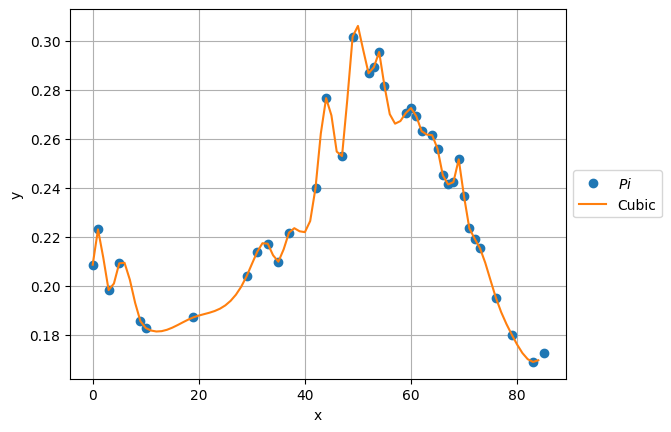

In [8]:
from scipy import interpolate

xi = np.arange(data.shape[0])[mask[:, 0, 0]]
yi = data[:, 0, 0].values[mask[:, 0, 0]]

# xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
interp = interpolate.interp1d(xi, yi, kind = "cubic")

x = np.arange(85) 
y = interp(x)
plt.plot(xi, yi, 'o', label = "$Pi$")
plt.plot(x, y, "-", label = "Cubic")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [122]:
x = np.array([1, 2, 3, 4, 5])
f = lambda x: x ** 2
squares = f(x)

xi = np.arange(data.shape[0])[mask[:, 0, 0]]
yi = data[:, 0, 0].values[mask[:, 0, 0]]

# xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
#interp = lambda x, y: interpolate.interp1d(np.arange(data.shape[0])[mask[:, x, y]], data[:, x, y].values[mask[:, x, y]], kind = "cubic")
#vec = interpolate.interp1d(np.arange(data.shape[0])[mask[:, x, y]], data[:, x, y].values[mask[:, x, y]], kind = "cubic")
import time
t = time.time()
def interp(x, y):
    xi = np.arange(data.shape[0])[mask[:, x, y]]
    yi =  data[:, x, y].values[mask[:, x, y]]
    interp = interpolate.interp1d(xi, yi, kind = "cubic")
    return 

A = np.arange(128)
B = np.arange(128)
vecinterp = np.vectorize(interp)
vecinterp(A, B)
print(time.time() - t)



AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [138]:
import time
import copy
t = time.time()
minicube = xr.open_dataset(filepath)
step = [minicube.time.values[i] for i in range(4, 450, 5)]
mask = (minicube.s2_mask.sel(time=step).values < 1.0)

data = minicube.s2_B07.sel(time=step).values * mask

def interpolation(data, mask):
    def interp(x, y):
        xi = np.arange(data.shape[0])[new_mask[:, x, y]]
        yi =  data[:, x, y][new_mask[:, x, y]]
        interp = interpolate.interp1d(xi, yi, kind = "linear")
        xj = np.arange(data.shape[0])[~new_mask[:, x, y]]
        data[:, x, y][~new_mask[:, x, y]] = interp(xj)
        return

    xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[2]))

    data[0, :, :][~mask[0, :, :]] = np.mean(data[0, :, :][mask[0, :, :]])
    data[-1, :, :][~mask[-1, :, :]] = np.mean(data[-1, :, :][mask[-1, :, :]])
    new_mask = copy.deepcopy(mask)
    new_mask[0,:,:] = new_mask[-1,:,:] = True
    vecinterp = np.vectorize(interp)
    vecinterp(xx, yy)
    return 


interpolation(data, mask)
print(time.time() - t)
# minicube.s2_B07.values[step, :, :] = data
xr.where(minicube.s2_B07.time in step, data, minicube.s2_B07)
data = minicube.s2_B07.sel(time=step).values
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
t= 0
for i in range(5):
    for j in range(5):
        #axes[i,j].set_aspect(1)
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        im = axes[i,j].imshow(data[t,:,:], vmin=0, vmax=1)
        #im = targ.isel(time=time[t]).plot(cmap=cmap_veg, ax=axes[i,j])
        t += 1 # non gap filled, a lot of nan values

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)

1.6346497535705566


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [132]:
minicube.s2_B07.sel(time=step).values = data
minicube.s2_B07

<xarray.DataArray 's2_B07' (time: 450, lat: 128, lon: 128)>
[7372800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2018-10-13 2018-10-14 ... 2020-01-05
  * lon      (lon) float64 2.873 2.873 2.873 2.874 ... 2.887 2.887 2.887 2.887
  * lat      (lat) float64 33.93 33.93 33.93 33.93 ... 33.92 33.92 33.92 33.92
Attributes:
    provider:            Sentinel 2
    interpolation_type:  linear
    description:         Red edge 3

In [115]:
#from numba import cuda
# from numba import jit
import scipy as sy
# from scipy import interpolate
import time
t = time.time()
minicube = xr.open_dataset(filepath)
step = [minicube.time.values[i] for i in range(4, 450, 5)]
mask = (minicube.s2_mask.sel(time=step).values < 1.0)

data = minicube.s2_B07.sel(time=step).values * mask

gridsize = 1024
blocksize = 1024

# @cuda.jit #(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def interp(x, y):
        xi = np.arange(data.shape[0])[mask[:, x, y]]
        yi =  data[:, x, y][mask[:, x, y]]
        interp = sy.interpolate.interp1d(xi, yi, kind = "linear")
        xj = np.arange(data.shape[0])[~mask[:, x, y]]
        data[:, x, y][~mask[:, x, y]] = interp(xj)
        return 

xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[2]))

data[0, :, :][~mask[0, :, :]] = np.mean(data[0, :, :][mask[0, :, :]])
data[-1, :, :][~mask[-1, :, :]] = np.mean(data[-1, :, :][mask[-1, :, :]])
mask[0,:,:] = mask[-1,:,:] = True

vecinterp = np.vectorize(interp)
vecinterp[gridsize, blocksize](xx, yy)
print(time.time() - t)

TypeError: 'vectorize' object is not subscriptable

In [ ]:
from multiprocessing import Process
import scipy as sy
import time

t = time.time()
minicube = xr.open_dataset(filepath)
step = [minicube.time.values[i] for i in range(4, 450, 5)]
mask = (minicube.s2_mask.sel(time=step).values < 1.0)

# data = minicube.s2_B07.sel(time=step).values * mask
data[0, :, :][~mask[0, :, :]] = np.mean(data[0, :, :][mask[0, :, :]])
data[-1, :, :][~mask[-1, :, :]] = np.mean(data[-1, :, :][mask[-1, :, :]])
mask[0,:,:] = mask[-1,:,:] = True

gridsize = 1024
blocksize = 1024

def interp(x, y):
        xi = np.arange(data.shape[0])[mask[:, x, y]]
        yi =  data[:, x, y][mask[:, x, y]]
        interp = sy.interpolate.interp1d(xi, yi, kind = "linear")
        xj = np.arange(data.shape[0])[~mask[:, x, y]]
        data[:, x, y][~mask[:, x, y]] = interp(xj)
        return 

xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[2]))


vecinterp = np.vectorize(interp)
vecinterp[gridsize, blocksize](xx, yy)

p = Process(target=bubble_sort, args=([1,9,4,5,2,6,8,4],))
p.start()
p.join()
print(time.time() - t)

In [111]:
t = time.time()
@jit #(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def interp(x, y):
        xi = np.arange(data.shape[0])[mask[:, x, y]]
        yi =  data[:, x, y][mask[:, x, y]]
        interp = sy.interpolate.interp1d(xi, yi, kind = "linear")
        xj = np.arange(data.shape[0])[~mask[:, x, y]]
        data[:, x, y][~mask[:, x, y]] = interp(xj)
        return 

xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[2]))

data[0, :, :][~mask[0, :, :]] = np.mean(data[0, :, :][mask[0, :, :]])
data[-1, :, :][~mask[-1, :, :]] = np.mean(data[-1, :, :][mask[-1, :, :]])
mask[0,:,:] = mask[-1,:,:] = True
vecinterp = np.vectorize(interp)
vecinterp(xx, yy)
print(time.time() - t)

/tmp/ipykernel_161650/129479887.py:3: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def interp(x, y):
/tmp/ipykernel_161650/129479887.py:2: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "interp" failed type inference due to: Unknown attribute 'interp1d' of type Module(<module 'scipy.interpolate' from '/User/homes/crobin/miniconda3/envs/EarthnetEnv2/lib/python3.8/site-packages/scipy/interpolate/__init__.py'>)

File "../../../../../../../../../tmp/ipykernel_161650/129479887.py", line 6:
<source missing, REPL/exec in use?>

During: typing of get attribute at /tmp/ipykernel_161650/129479887.py (6)

File "../../../../../../..

2.0385236740112305


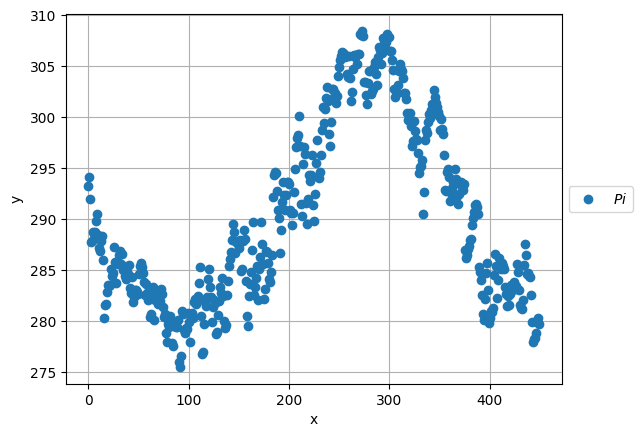

In [94]:
data = minicube.era5_t2m.values
xi = np.arange(data.shape[0])
yi = data

def interpolation(data, mask):
    def interp(x, y):
        xi = np.arange(data.shape[0])[mask[:, x, y]]
        yi =  data[:, x, y][mask[:, x, y]]
        interp = interpolate.interp1d(xi, yi, kind = "linear")
        xj = np.arange(data.shape[0])[~mask[:, x, y]]
        data[:, x, y][~mask[:, x, y]] = interp(xj)
        return 

    xx, yy = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[2]))

    data[0, :, :][~mask[0, :, :]] = np.mean(data[0, :, :][mask[0, :, :]])
    data[-1, :, :][~mask[-1, :, :]] = np.mean(data[-1, :, :][mask[-1, :, :]])
    mask[0,:,:] = mask[-1,:,:] = True
    vecinterp = np.vectorize(interp)
    vecinterp(xx, yy)
    print(time.time() - t)

plt.plot(xi, yi, 'o', label = "$Pi$")
# plt.plot(x, y, "-", label = "Cubic")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

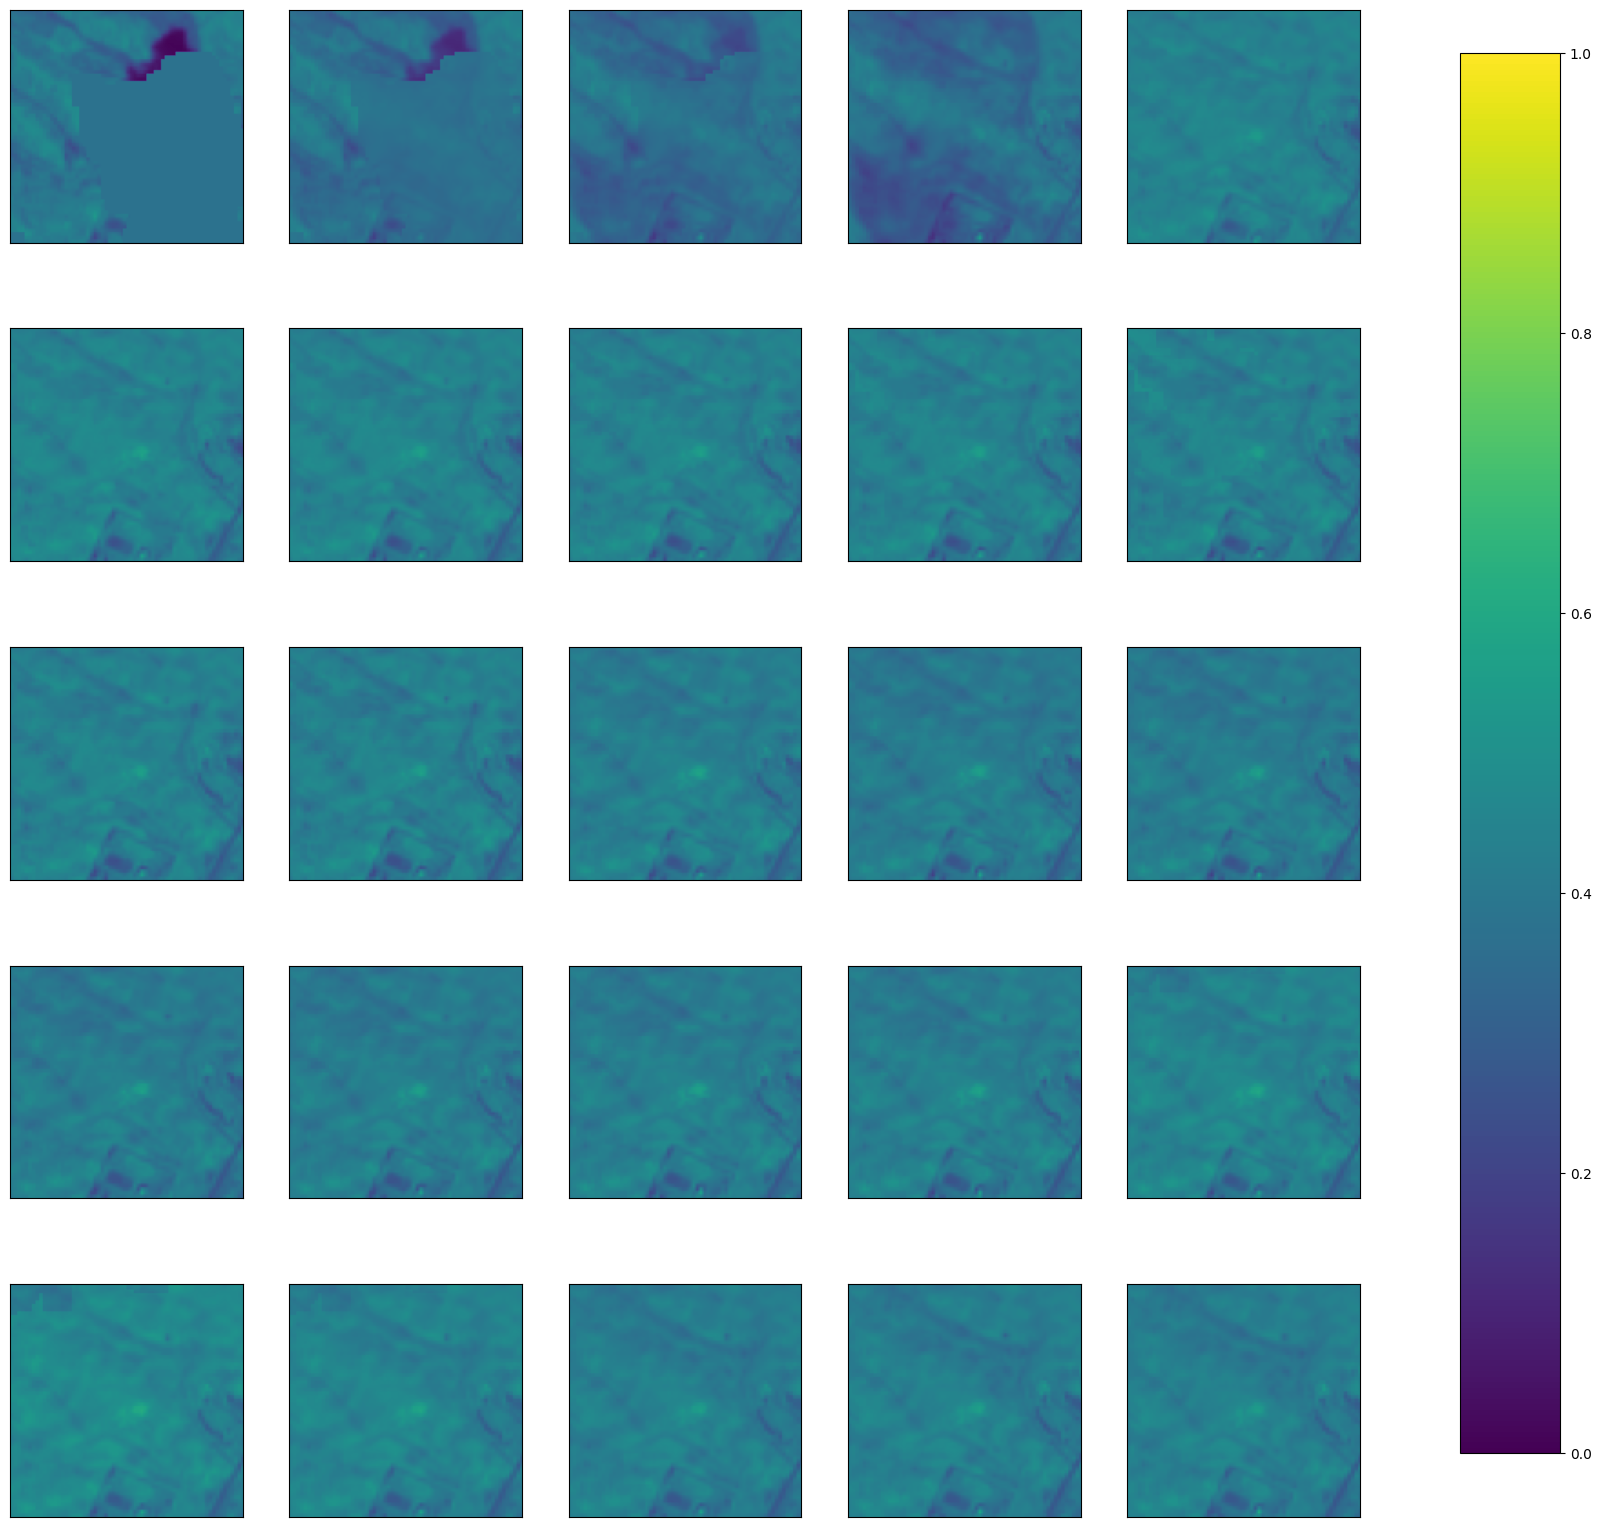

In [93]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
t= 0
for i in range(5):
    for j in range(5):
        #axes[i,j].set_aspect(1)
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        im = axes[i,j].imshow(data[t,:,:], vmin=0, vmax=1)
        #im = targ.isel(time=time[t]).plot(cmap=cmap_veg, ax=axes[i,j])
        t += 1 # non gap filled, a lot of nan values

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)